In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0,16.0)
import pandas as pd


chrom - Name of the chromosome (or contig, scaffold, etc.).

chromStart - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.

chromEnd - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99.

name - Name given to a region (preferably unique). Use '.' if no name is assigned.

score - Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were '0' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000.

strand - +/- to denote strand or orientation (whenever applicable). Use '.' if no orientation is assigned.

signalValue - Measurement of overall (usually, average) enrichment for the region.

pValue - Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.

qValue - Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.

peak - Point-source called for this peak; 0-based offset from chromStart. Use -1 if no point-source called.

In [2]:
narrowpeak_cols = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']
broadpeak_cols = narrowpeak_cols[:-1]
questpeak_cols = ['chrom', 'peak', 'signalValue']

columns = {'narrowPeak': narrowpeak_cols, 'broadPeak': broadpeak_cols, 'questPeak': questpeak_cols}

def determine_filetype(df):
    c = len(df.columns)
    if c==10:
        return 'narrowPeak'
    elif c==9:
        return 'broadPeak'
    elif c==3:
        return 'questPeak'
    return 'unknown'

replicate1 = pd.read_table('data/ENCSR000DPM/ENCFF001XLV.bed')
replicate2 = pd.read_table('data/ENCSR000DPM/ENCFF001XLW.bed')
replicate1_type = determine_filetype(replicate1)
assert replicate1_type!='unknown'

replicate2_type = determine_filetype(replicate2)
assert replicate2_type!='unknown'

replicate1.columns = columns[replicate1_type]
replicate2.columns = columns[replicate2_type]



In [3]:
def update_peaks(df):
    df['peak'] = np.where(df['peak'] == -1, (df['chromStart']+df['chromEnd'])/2.0, df['peak'])
    return df
replicate1 = update_peaks(replicate1)
replicate2 = update_peaks(replicate2)

In [4]:
replicate1['label'] = 1
replicate2['label'] = 2

In [5]:
replicate1.append(replicate2)

,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,label
0,chr1,91440,91590,.,0,.,28,24.59990,-1,91515,1
1,chr1,104840,104990,.,0,.,13,12.86260,-1,104915,1
2,chr1,237740,237890,.,0,.,130,73.02200,-1,237815,1
3,chr1,564520,564670,.,0,.,64,53.40150,-1,564595,1
4,chr1,568040,568190,.,0,.,27,16.74000,-1,568115,1
5,chr1,568960,569110,.,0,.,69,41.30790,-1,569035,1
6,chr1,569780,569930,.,0,.,65,36.99090,-1,569855,1
7,chr1,714140,714290,.,0,.,44,36.46620,-1,714215,1
8,chr1,753400,753550,.,0,.,9,5.90660,-1,753475,1
9,chr1,785880,786030,.,0,.,35,30.27640,-1,785955,1


In [6]:
columns_to_retain = ['chrom', 'peak', 'signalValue', 'label']
combined_df = replicate1[columns_to_retain]

In [7]:
combined_df = combined_df.sort(['chrom', 'peak'])

In [9]:
grouped = combined_df.groupby('chrom')

In [21]:
BIN_WIDTH = 40
from collections import defaultdict
bin = defaultdict( list )
combined_df['bin'] = combined_df['peak']//BIN_WIDTH
unique_bins = np.unique(combined_df['bin'])
for bin in unique_bins[1:100]:
    df = combined_df[combined_df['bin']==bin]
    label = df['label']
    print('bin: {} label_length: {}'.format(bin, len(label)))

bin: 362.0 label_length: 1
bin: 470.0 label_length: 1
bin: 545.0 label_length: 1
bin: 731.0 label_length: 1
bin: 1059.0 label_length: 1
bin: 1091.0 label_length: 1
bin: 1318.0 label_length: 1
bin: 1347.0 label_length: 1
bin: 1427.0 label_length: 1
bin: 1605.0 label_length: 1
bin: 1709.0 label_length: 1
bin: 1719.0 label_length: 1
bin: 1841.0 label_length: 1
bin: 1939.0 label_length: 1
bin: 1970.0 label_length: 1
bin: 2088.0 label_length: 1
bin: 2117.0 label_length: 1
bin: 2209.0 label_length: 1
bin: 2287.0 label_length: 1
bin: 2350.0 label_length: 1
bin: 2402.0 label_length: 1
bin: 2542.0 label_length: 1
bin: 2622.0 label_length: 1
bin: 2895.0 label_length: 1
bin: 2964.0 label_length: 1
bin: 2983.0 label_length: 1
bin: 3004.0 label_length: 1
bin: 3065.0 label_length: 1
bin: 3126.0 label_length: 1
bin: 3156.0 label_length: 1
bin: 3356.0 label_length: 1
bin: 3360.0 label_length: 1
bin: 3431.0 label_length: 1
bin: 3676.0 label_length: 1
bin: 3930.0 label_length: 1
bin: 3933.0 label_length

(array([ 11610.,  13625.,  10451.,   7742.,   7336.,   5606.,   3568.,
          1924.,   1370.,   1161.]),
 array([  3.36000000e+02,   6.23350100e+05,   1.24636420e+06,
          1.86937830e+06,   2.49239240e+06,   3.11540650e+06,
          3.73842060e+06,   4.36143470e+06,   4.98444880e+06,
          5.60746290e+06,   6.23047700e+06]),
 <a list of 10 Patch objects>)

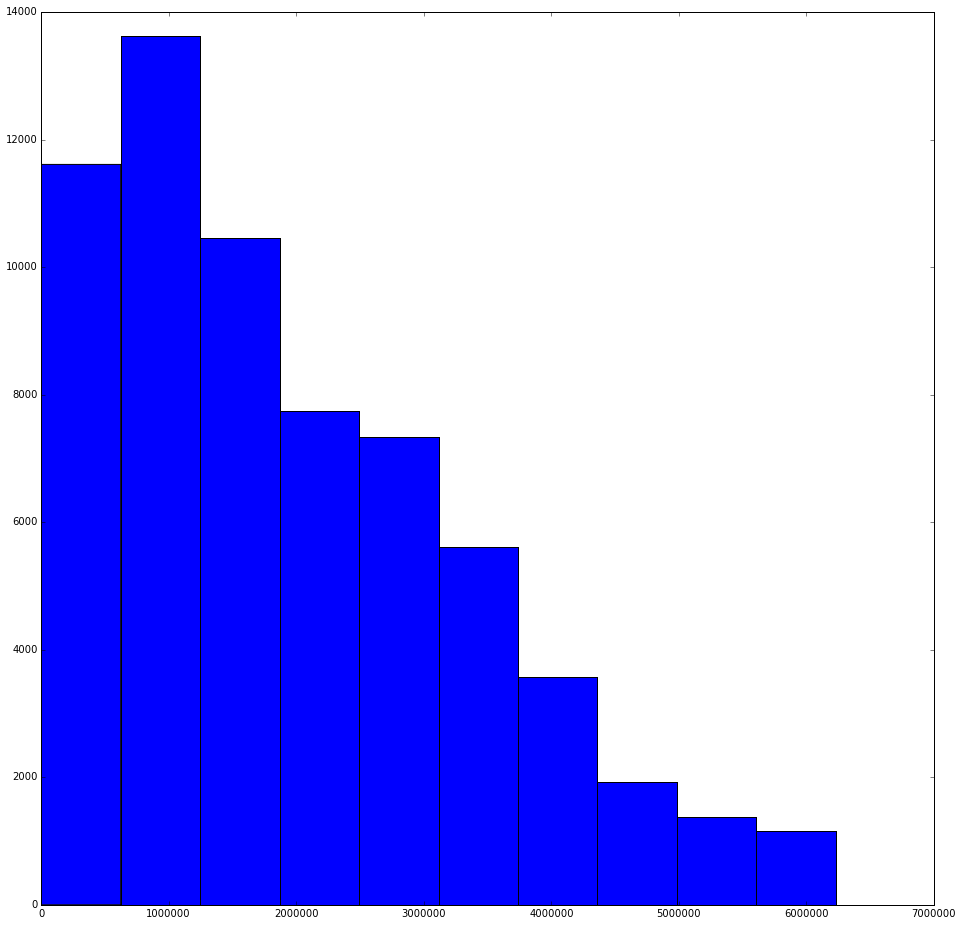

In [16]:
import matplotlib.pyplot as plt
plt.hist(combined_df['bin'])

In [19]:
unique_bins

array([  3.36000000e+02,   3.62000000e+02,   4.70000000e+02, ...,
         6.22919400e+06,   6.23001600e+06,   6.23047700e+06])

In [20]:
len(combined_df['bin'])

64393